In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import  DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# decision Tree
- 

In [44]:
df = pd.read_csv('Cases/Wisconsin/BreastCancer.csv')

In [46]:
y= df['Class']
X= df.drop('Class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 24, test_size=0.3, stratify= y)

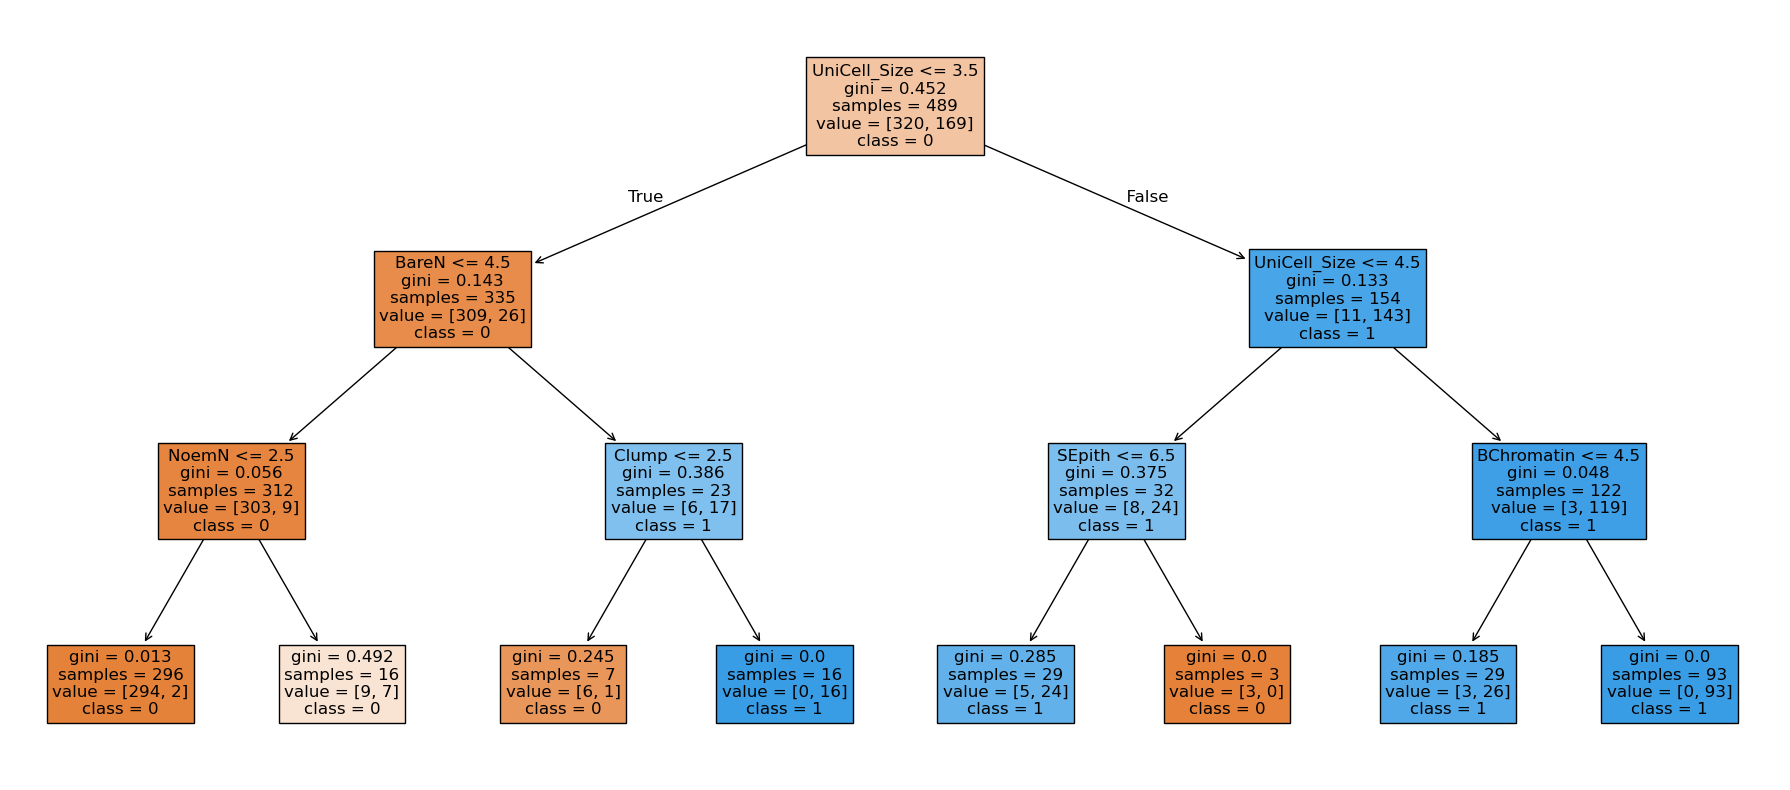

In [54]:
dtc= DecisionTreeClassifier(random_state=24, max_depth=3)
dtc.fit(X_train, y_train)
plt.figure(figsize=(18,8))
plot_tree(dtc, feature_names= list(X.columns), class_names=['0','1'], filled= True, fontsize=12)
plt.tight_layout()
plt.show()

In [50]:
y_pred = dtc.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9523809523809523

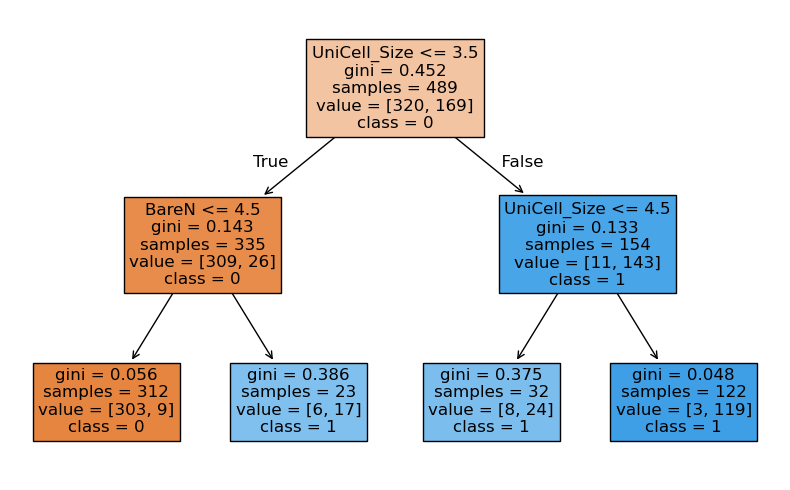

In [66]:
dtc= DecisionTreeClassifier(random_state = 24, max_depth = 2)
dtc.fit(X_train, y_train)
plt.figure(figsize=(8,5))
plot_tree(dtc, feature_names= list(X.columns), class_names=['0','1'], filled= True, fontsize=12)
plt.tight_layout()
plt.show()

## using GCV

In [73]:
dtc = DecisionTreeClassifier(random_state = 24)
params = {'max_depth': [2,3,4,5,6,None]}
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 24)
gcv = GridSearchCV(dtc, param_grid = params, cv = kfold, scoring = 'roc_auc')
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None]},
             scoring='roc_auc')

In [75]:
gcv.best_params_

{'max_depth': 5}

In [77]:
gcv.best_score_

0.9607632219156177

In [ ]:
plot_tree(dtc, feature_names= list(X.columns), class_names=['0','1'], filled= True, fontsize=12)


In [85]:
y.unique().tolist()

['Benign', 'Malignant']

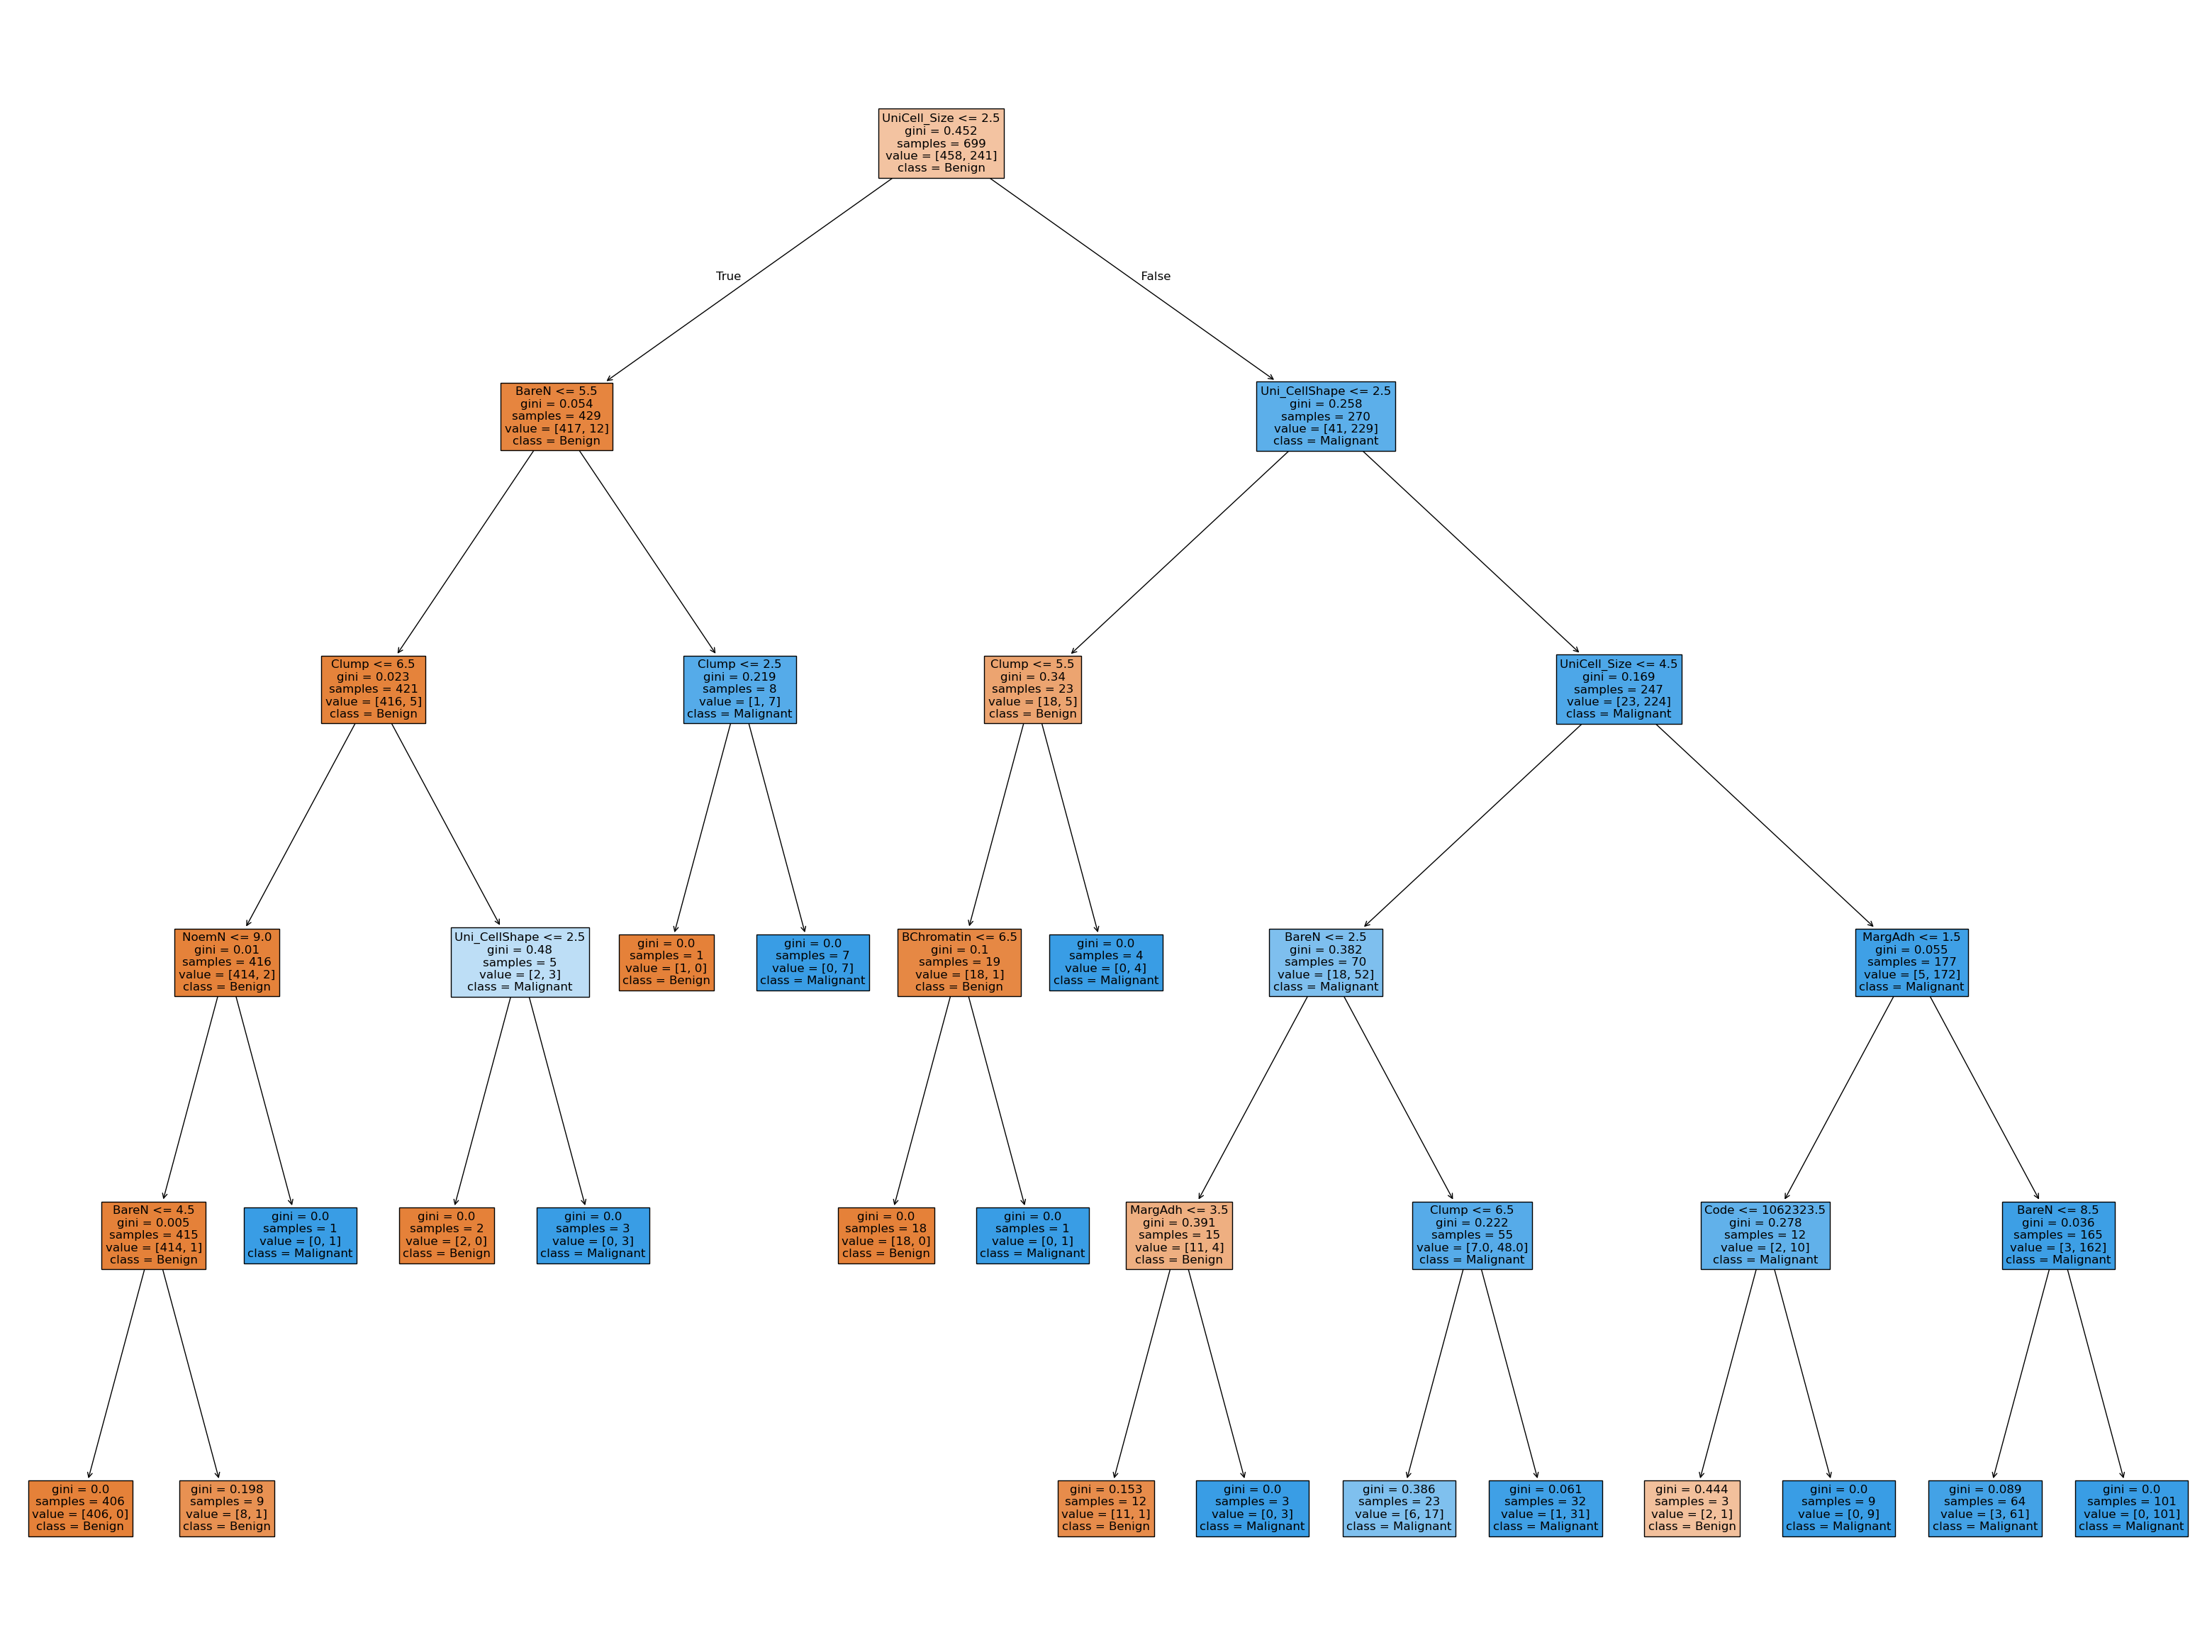

<Figure size 640x480 with 0 Axes>

In [111]:
best_tree = gcv.best_estimator_
plt.figure(figsize=(40,30))
plot_tree(best_tree, feature_names= list(X.columns), class_names= y.unique().tolist(), filled= True, fontsize=12)
plt.show()
plt.tight_layout()

In [133]:
# not all variables of the Dataset used in tree and there are some variable which are used more than once
# we have to find how much a variable contributed to reducing the ginni index

In [135]:
X.columns

Index(['Code', 'Clump', 'UniCell_Size', 'Uni_CellShape', 'MargAdh', 'SEpith',
       'BareN', 'BChromatin', 'NoemN', 'Mitoses'],
      dtype='object')

###  to see feature importance(ginin importance)
- **DT.feature_importance_**

In [149]:

print(X.columns)
best_tree.feature_importances_

Index(['Code', 'Clump', 'UniCell_Size', 'Uni_CellShape', 'MargAdh', 'SEpith',
       'BareN', 'BChromatin', 'NoemN', 'Mitoses'],
      dtype='object')


array([0.00679471, 0.04278266, 0.77526383, 0.07611931, 0.01537848,
       0.        , 0.07047816, 0.00643709, 0.00674575, 0.        ])

In [155]:
df = pd.DataFrame({'features' : X.columns.tolist(), 'importance' : best_tree.feature_importances_})
df

,features,importance
0,Code,0.006795
1,Clump,0.042783
2,UniCell_Size,0.775264
3,Uni_CellShape,0.076119
4,MargAdh,0.015378
5,SEpith,0.000000
6,BareN,0.070478
7,BChromatin,0.006437
8,NoemN,0.006746
9,Mitoses,0.000000


In [169]:
df.sort_values(by = 'importance', inplace = True)

<BarContainer object of 10 artists>

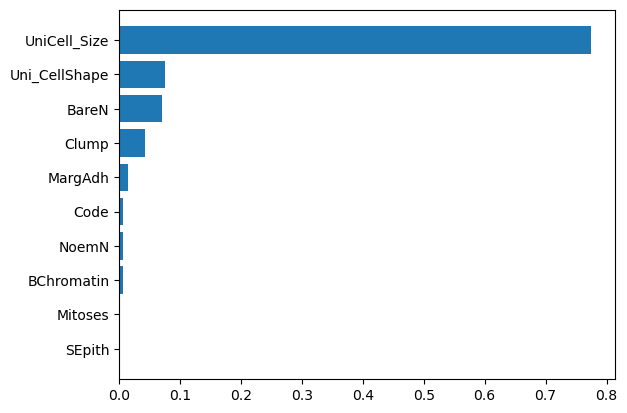

In [171]:
plt.barh(df.features, df.importance)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'SEpith'),
  Text(1, 0, 'Mitoses'),
  Text(2, 0, 'BChromatin'),
  Text(3, 0, 'NoemN'),
  Text(4, 0, 'Code'),
  Text(5, 0, 'MargAdh'),
  Text(6, 0, 'Clump'),
  Text(7, 0, 'BareN'),
  Text(8, 0, 'Uni_CellShape'),
  Text(9, 0, 'UniCell_Size')])

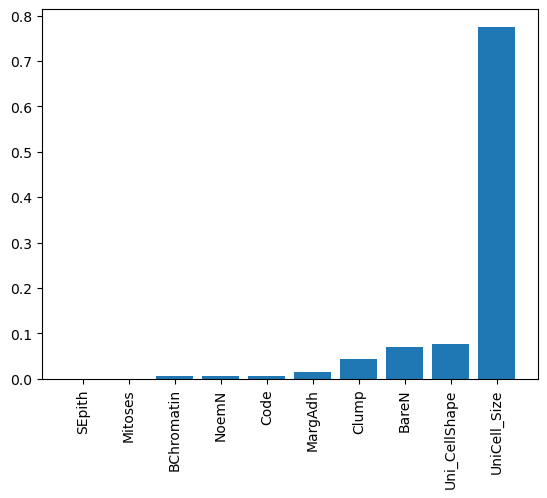

In [177]:
plt.bar(df.features, df.importance)
plt.xticks(rotation = 90)